<a href="https://colab.research.google.com/github/hegame1998/Probability-/blob/main/Metropolis_Hastings_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

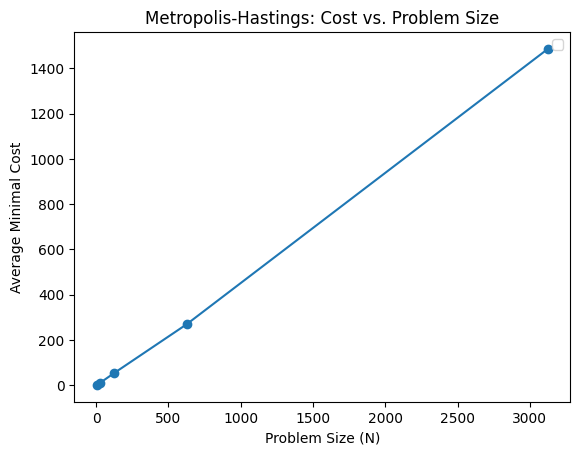

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Set up logging to provide real-time feedback on the script execution
logging.basicConfig(level=logging.INFO)

# Function to generate an N x N cost matrix with values drawn from a uniform distribution between 0 and 1
def generate_cost_matrix(n):
    return np.random.uniform(0, 1, (n, n))

# Function to calculate the total cost of a given permutation sigma using the cost matrix C
def calculate_cost(C, sigma):
    return sum(C[i, sigma[i]] for i in range(len(sigma)))

# Function to propose a new permutation by swapping two random elements in the current permutation
def propose_new_permutation(sigma):
    new_sigma = sigma.copy()  # Create a copy of the current permutation
    i, j = np.random.choice(len(sigma), 2, replace=False)  # Randomly select two indices to swap
    new_sigma[i], new_sigma[j] = new_sigma[j], new_sigma[i]  # Swap the selected elements
    return new_sigma

# Function to run the Metropolis-Hastings algorithm to find a low-cost permutation
def metropolis_hastings(C, beta, N):
    n = C.shape[0]  # Get the size of the cost matrix
    sigma = np.random.permutation(n)  # Start with a random permutation
    current_cost = calculate_cost(C, sigma)  # Calculate the cost of the initial permutation

    for _ in range(N):  # Perform N iterations
        new_sigma = propose_new_permutation(sigma)  # Propose a new permutation
        new_cost = calculate_cost(C, new_sigma)  # Calculate the cost of the proposed permutation
        # Accept the new permutation with a probability based on the cost difference and beta
        if new_cost < current_cost or np.random.rand() < np.exp(-beta * (new_cost - current_cost)):
            sigma, current_cost = new_sigma, new_cost  # Update to the new permutation and cost if accepted

    return sigma, current_cost  # Return the best found permutation and its cost

# Function to run the simulation for different problem sizes and gather average minimal costs
def run_simulation(n_values, beta, N, M):
    results = []  # List to store average minimal costs for each problem size

    for n in n_values:  # Iterate over the list of problem sizes
        total_cost = 0  # Initialize total cost for the current problem size
        for _ in range(M):  # Repeat M times to gather sufficient data
            C = generate_cost_matrix(n)  # Generate a random cost matrix
            _, min_cost = metropolis_hastings(C, beta, N)  # Run the Metropolis-Hastings algorithm
            total_cost += min_cost  # Accumulate the minimal cost
        avg_cost = total_cost / M  # Calculate the average minimal cost
        results.append(avg_cost)  # Store the result for the current problem size

    return results  # Return the list of average minimal costs

# Define parameters for the simulation
beta = 1.0  # Beta parameter for the Metropolis-Hastings algorithm
N = 1000  # Number of iterations for the Metropolis-Hastings algorithm
M = 10  # Number of simulations for each problem size
n_values = [5 ** alpha for alpha in range(1, 6)]  # List of different problem sizes to test

# Run the simulation and gather results
results = run_simulation(n_values, beta, N, M)

# Plot the results
plt.plot(n_values, results, marker='o')
plt.xlabel('Problem Size (N)')
plt.ylabel('Average Minimal Cost')
plt.title('Metropolis-Hastings: Cost vs. Problem Size')
plt.legend()
plt.show()  # Display the plot
